# Main idea
The z-test leads to more false positive errors than the welch t-test when the variances and the sample sizes are different (even if the total sample size is huge).

# Packages

In [92]:
import numpy as np
import pandas as pd
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Parameters
2 population means, 2 population standard deviations, 2 sample sizes

In [93]:
# huge total sample size, but very different sample sizes and variances 
m1, m2, s1, s2, n1, n2 = 0, 0, 1, 2, 67000, 33000

# print
"m1 = {}, m2 = {} (no difference), s1 = {}, s2 = {} (2x standard deviation), n1 = {}, n2 = {} (1/2 group size)".format(str(m1), str(m2), str(s1), str(s2), str(n1), str(n2))

'm1 = 0, m2 = 0 (no difference), s1 = 1, s2 = 2 (2x standard deviation), n1 = 67000, n2 = 33000 (1/2 group size)'

# Simple examples

## Sample data

In [94]:
group1 = np.random.normal(loc = m1, scale = s1, size = n1)
group2 = np.random.normal(loc = m2, scale = s2, size = n2)

## Tests

### z-test (assumes normal distribution, equal variances)

In [95]:
z, p = sm.stats.ztest(group1, group2, value = 0, alternative = "two-sided", usevar = "pooled")

# result
"z = {}, p = {}".format(str(z), str(p))

'z = 1.0302746257583522, p = 0.30288110691878456'

### Welch t-test

In [96]:
t, p, df = sm.stats.ttest_ind(group1, group2, value = 0, alternative = "two-sided", usevar = "unequal")

# result
"t({}) = {}, p = {}".format(str(df), str(t), str(p))

't(41397.31827739589) = 0.8386111039054838, p = 0.40169241969093294'

# Simulation

In [97]:
# containers
zs, ts, pzs, pts, dfs = [], [], [], [], []

for _ in range(10000):
    # two groups
    group1 = np.random.normal(loc = m1, scale = s1, size = n1)
    group2 = np.random.normal(loc = m2, scale = s2, size = n2)
    
    # z-test
    z, pz = sm.stats.ztest(group1, group2, value = 0, alternative = "two-sided", usevar = "pooled")
    
    # welch t-test
    t, pt, df = sm.stats.ttest_ind(group1, group2, value = 0, alternative = "two-sided", usevar = "unequal")
    
    # append containers
    zs.append(z)
    ts.append(t)
    pzs.append(pz)
    pts.append(pt)
    dfs.append(df)

# False positive error rates

## z-test

In [98]:
"The z-test false positive rate was {}% (should be 5%).".format(str(np.mean(np.array(pzs) < 0.05) * 100))

'The z-test false positive rate was 10.9% (should be 5%).'

## welch t-test

In [99]:
"The Welch t-test false positive rate was {}% (should be 5%).".format(str(np.mean(np.array(pts) < 0.05) * 100))

'The Welch t-test false positive rate was 4.72% (should be 5%).'

## Barplot

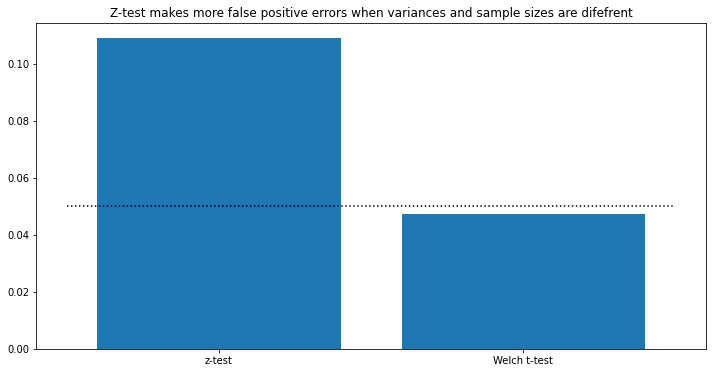

In [100]:
# figure size
plt.figure(figsize = (12, 6))

# bar plot
plt.bar(["z-test", "Welch t-test"], [np.mean(np.array(pzs) < 0.05), np.mean(np.array(pts) < 0.05)])

# nominal error rate = 5%
plt.hlines(y = 0.05, xmin = -0.5, xmax = 1.5, linestyles = "dotted")

# titles
plt.title("Z-test makes more false positive errors when variances and sample sizes are difefrent");